In [1]:
pip install pandas numpy scikit-learn nltk matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
print(os.getcwd())

C:\Users\saksh


In [8]:
path = r"C:\Users\saksh\Documents\JupyterProjects"
print(path)

C:\Users\saksh\Documents\JupyterProjects


In [24]:
import pandas as pd

df = pd.read_csv(r"C:\Users\saksh\Documents\JupyterProjects\IMDB Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [13]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [14]:
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords list once
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Clean the reviews column
df['clean_review'] = df['review'].apply(clean_text)

print(df[['review', 'clean_review']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                        clean_review  
0  one reviewers mentioned watching 1 oz episode ...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically theres family little boy jake thinks...  
4  petter matteis love time money visually stunni...  


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # Limit features for speed
X = tfidf.fit_transform(df['clean_review']).toarray()

print(X.shape)  # (number of samples, number of features)

(50000, 5000)


In [16]:
y = df['sentiment'].map({'positive': 1, 'negative': 0}).values

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not done
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Cleaning function
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Step 1: Create clean_review column
df['clean_review'] = df['review'].apply(clean_text)

# ---- THEN lemmatize ----
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['clean_lemmatized_review'] = df['clean_review'].apply(lemmatize_text)

df[['review', 'clean_review', 'clean_lemmatized_review']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,review,clean_review,clean_lemmatized_review
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching 1 oz episode ...,one reviewer mentioned watching 1 oz episode y...
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...,petter matteis love time money visually stunni...


In [3]:
# 1. Imports
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

# 2. Load dataset
df = pd.read_csv(r"C:\Users\saksh\Documents\JupyterProjects\IMDB Dataset.csv")

# 3. Download resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# 4. Cleaning function
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_review'] = df['review'].apply(clean_text)

# 5. Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['clean_lemmatized_review'] = df['clean_review'].apply(lemmatize_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# === Feature Extraction ===
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert cleaned text into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['clean_lemmatized_review']).toarray()
y = df['sentiment'].map({'positive': 1, 'negative': 0}).values

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Model Training & Evaluation ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1 Score": round(f1_score(y_test, y_pred), 4)
    })

import pandas as pd
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
display(results_df)


In [28]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['clean_lemmatized_review'] = df['clean_review'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # include unigrams & bigrams
X = tfidf.fit_transform(df['clean_lemmatized_review']).toarray()

# Target variable (convert positive/negative → 1/0)
y = df['sentiment'].map({'positive': 1, 'negative': 0}).values

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# Feature extraction from cleaned & lemmatized text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['clean_lemmatized_review']).toarray()
y = df['sentiment'].map({'positive': 1, 'negative': 0}).values

#  Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Train models and evaluate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")



Logistic Regression
Accuracy: 0.8893
Precision: 0.8795
Recall: 0.9041
F1 Score: 0.8917

Naive Bayes
Accuracy: 0.8608
Precision: 0.8532
Recall: 0.8742
F1 Score: 0.8636

SVM
Accuracy: 0.8861
Precision: 0.8804
Recall: 0.8956
F1 Score: 0.8879


In [7]:
feature_names = tfidf.get_feature_names_out()
coef = best_model.coef_[0]

# Top Positive
top_pos = sorted(zip(coef, feature_names), reverse=True)[:20]
# Top Negative
top_neg = sorted(zip(coef, feature_names))[:20]

print("\nTop Positive Words:")
for c, w in top_pos:
    print(w, round(c, 3))

print("\nTop Negative Words:")
for c, w in top_neg:
    print(w, round(c, 3))


Top Positive Words:
great 6.61
excellent 6.571
710 5.258
perfect 5.012
amazing 4.744
wonderful 4.693
brilliant 4.505
favorite 4.365
hilarious 4.198
best 4.121
one best 4.105
loved 4.103
fantastic 3.881
superb 3.866
810 3.824
enjoyable 3.76
today 3.732
entertaining 3.684
enjoyed 3.607
perfectly 3.522

Top Negative Words:
worst -9.068
awful -7.244
bad -6.928
waste -6.668
boring -6.57
terrible -5.733
poor -5.714
nothing -5.271
dull -5.085
poorly -5.029
horrible -4.844
worse -4.804
fails -4.675
410 -4.65
disappointing -4.646
unfortunately -4.549
disappointment -4.382
supposed -4.368
lame -4.22
annoying -4.196


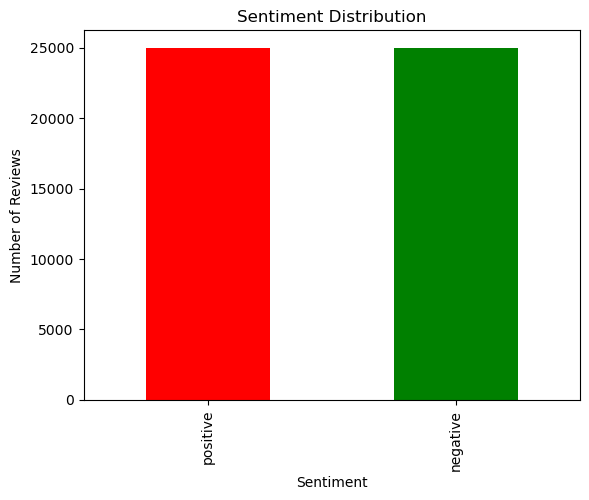

In [11]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

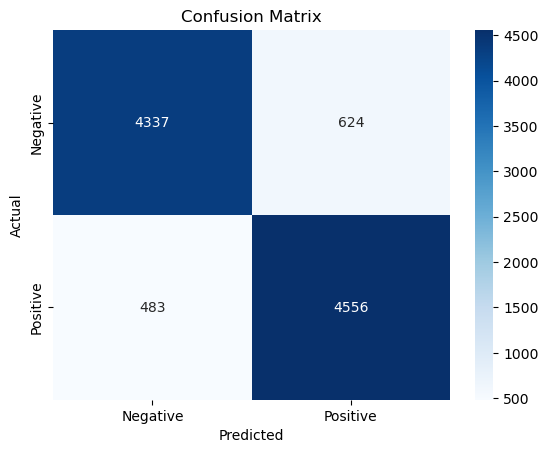

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

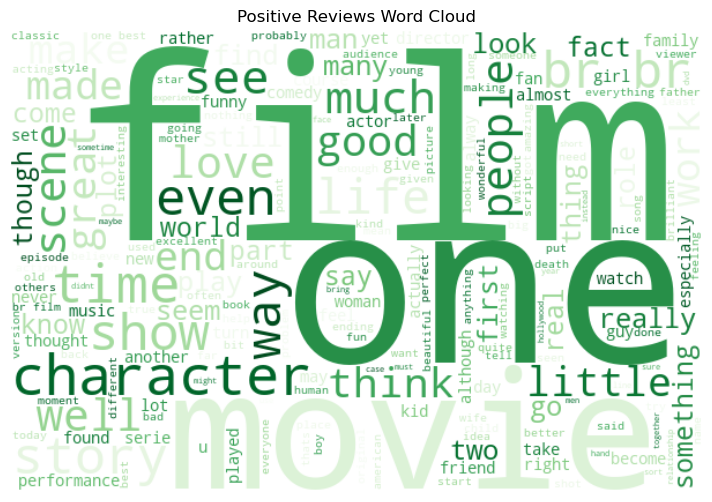

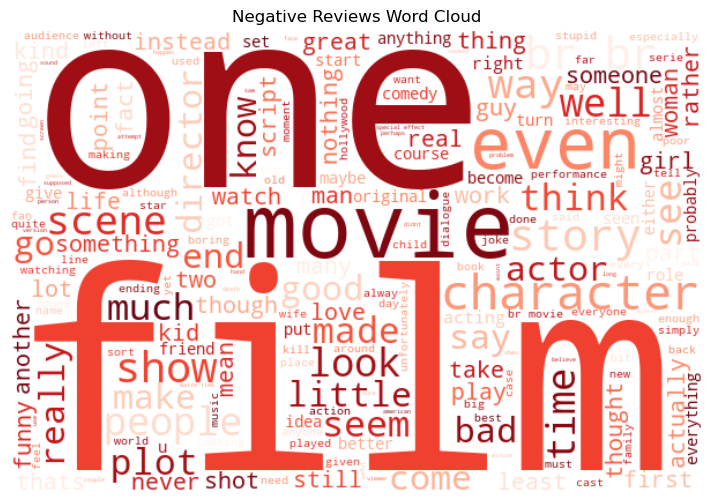

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(df[df['sentiment'] == 'positive']['clean_lemmatized_review'])
negative_text = " ".join(df[df['sentiment'] == 'negative']['clean_lemmatized_review'])

def plot_wordcloud(text, title, color_map):
    wordcloud = WordCloud(width=600, height=400, background_color='white', colormap=color_map).generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(positive_text, 'Positive Reviews Word Cloud', 'Greens')
plot_wordcloud(negative_text, 'Negative Reviews Word Cloud', 'Reds')

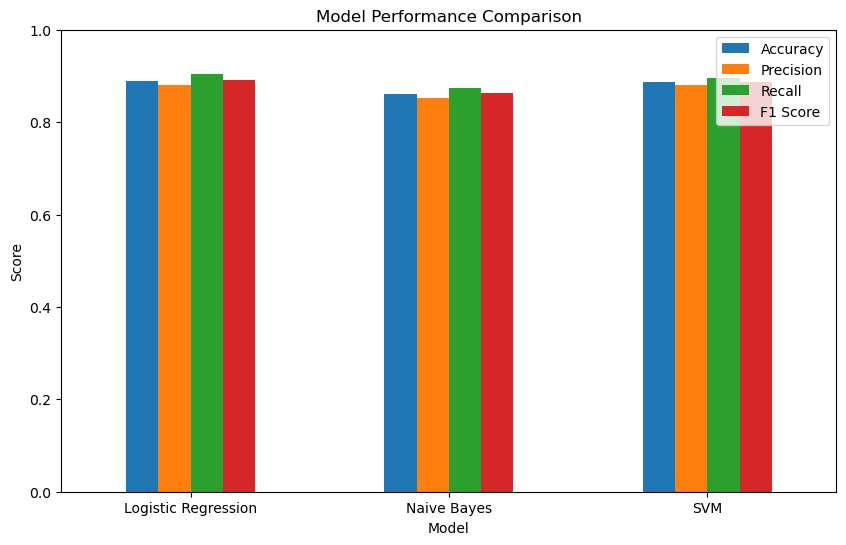

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.DataFrame(results)

results_df.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1 Score'], kind='bar', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

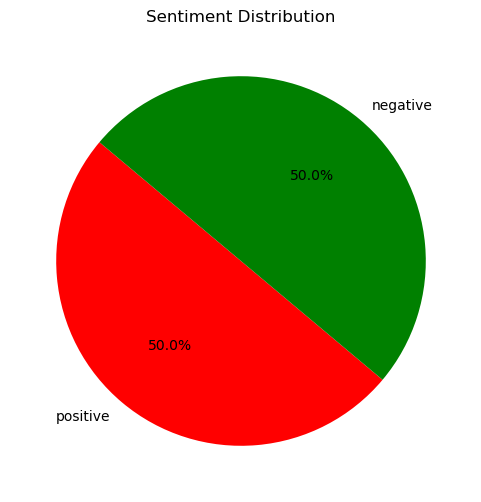

In [15]:
import matplotlib.pyplot as plt

# Count the number of positive and negative reviews
sentiment_counts = df['sentiment'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
colors = ['red', 'green']
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

In [35]:
# Install lime if not already installed
!pip install lime

import numpy as np
import lime
import lime.lime_text
from sklearn.pipeline import make_pipeline

# Assuming you have your vectorizer and one trained model, e.g.,
# tfidf vectorizer: tfidf
# model: model_lr (Logistic Regression)

# Create a pipeline for LIME to understand the vectorizer + model together
c = make_pipeline(tfidf, model_lr)

# Initialize LIME text explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=['Negative', 'Positive'])

# Example review to explain
review_example = "The movie had a great plot but the acting was terrible."

# Get explanation for this review
exp = explainer.explain_instance(review_example, c.predict_proba, num_features=10)

# Show explanation as list of (word, contribution) tuples
print("Explanation for review sentiment prediction:")
print(exp.as_list())

# Visualize explanation inline (in Jupyter Notebook)
exp.show_in_notebook(text=review_example)


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283887 sha256=4d85779173142c6bec0c3f33cd7b8385381dd3708b6c504f1210126c4224aadc
  Stored in directory: c:\users\saksh\appdata\local\pip\cache\wheels\7c\04\5c\157dc9106512a6c7a30653ec064490c94a49e0fc8f63d19ab9
Successfully built lime


  DEPRECATION: Building 'lime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lime'. Discussion can be found at https://github.com/pypa/pip/issues/6334


Explanation for review sentiment prediction:
[('terrible', -0.5387809223951483), ('great', 0.3177993319982347), ('plot', -0.08639778056620068), ('acting', -0.05285114470399162), ('had', -0.046592305394622086), ('movie', 0.015053199187318803), ('a', 0.006306196214193625), ('the', 0.0043709678144658376), ('The', 0.0036290103634053056), ('was', -0.0031018349697249908)]


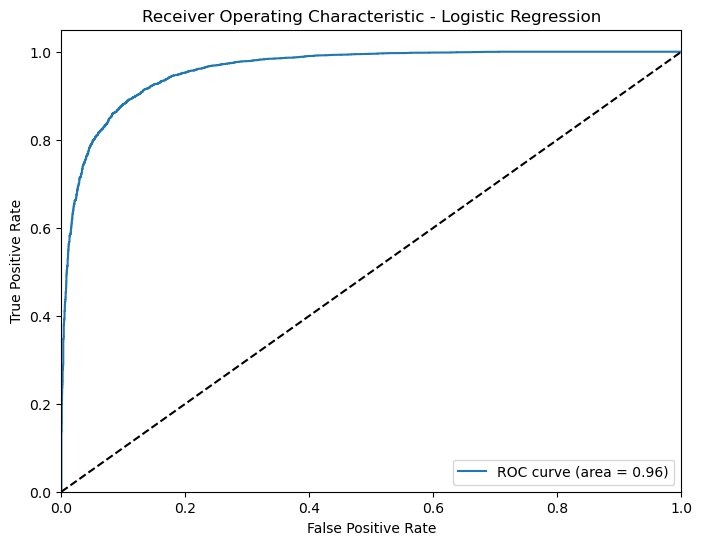

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probability scores for positive class
y_scores = model_lr.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

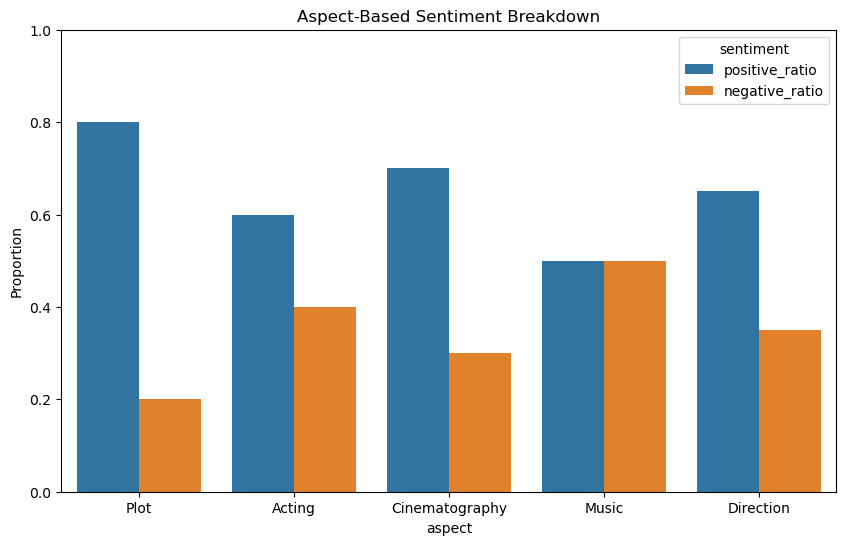

In [39]:
import seaborn as sns

# Sample aspect sentiment data (replace with your actual aspect sentiment extraction)
aspect_sentiments = pd.DataFrame({
    'aspect': ['Plot', 'Acting', 'Cinematography', 'Music', 'Direction'],
    'positive_ratio': [0.8, 0.6, 0.7, 0.5, 0.65],
    'negative_ratio': [0.2, 0.4, 0.3, 0.5, 0.35]
})

# Melt for seaborn
aspect_melted = aspect_sentiments.melt(id_vars='aspect', value_vars=['positive_ratio', 'negative_ratio'],
                                      var_name='sentiment', value_name='ratio')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=aspect_melted, x='aspect', y='ratio', hue='sentiment')
plt.title('Aspect-Based Sentiment Breakdown')
plt.ylabel('Proportion')
plt.ylim(0,1)
plt.show()

   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 1.5 MB/s  0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2

C:\Users\saksh\.anaconda\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


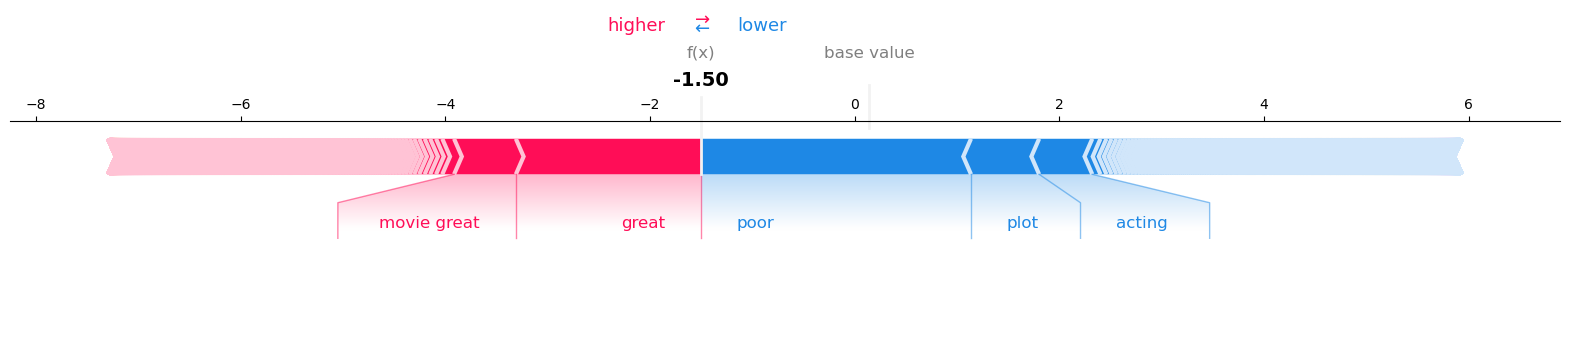

In [40]:
# Install SHAP if not already installed
!pip install shap

import shap
import matplotlib.pyplot as plt

# Assume you have your TF-IDF vectorizer 'tfidf' and trained Logistic Regression model 'model_lr'

# Create explainer for a linear model
explainer = shap.LinearExplainer(model_lr, tfidf.transform(df['clean_lemmatized_review']).toarray(), feature_perturbation="interventional")

# Select a review to explain
review_text = "The movie had a great plot but poor acting."

# Preprocess review as usual
review_clean = clean_text(review_text)
review_lem = lemmatize_text(review_clean)
review_vect = tfidf.transform([review_lem]).toarray()

# Get SHAP values
shap_values = explainer.shap_values(review_vect)

# Plot SHAP explanation for this single review
feature_names = tfidf.get_feature_names_out()
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, feature_names=feature_names, matplotlib=True, show=True)


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

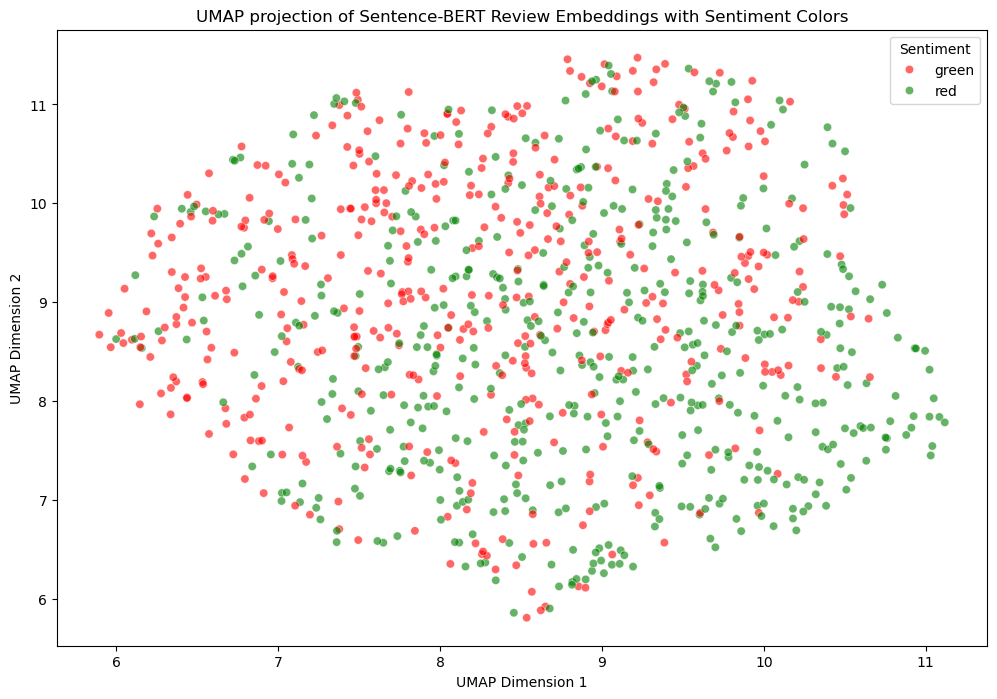

In [42]:
# Sample 1000 indices for reproducibility and exact alignment
sample_indices = df.sample(1000, random_state=42).index

# Extract texts and sentiments using the same indices
sample_texts = df.loc[sample_indices, 'clean_lemmatized_review'].tolist()
sentiment_labels = df.loc[sample_indices, 'sentiment'].map({'positive': 'green', 'negative': 'red'}).tolist()

# Generate embeddings
embeddings = model.encode(sample_texts, show_progress_bar=True)

# Reduce dimensionality to 2D
embedding_2d = reducer.fit_transform(embeddings)

# Now plot with aligned data lengths
plt.figure(figsize=(12,8))
sns.scatterplot(x=embedding_2d[:,0], y=embedding_2d[:,1], hue=sentiment_labels, palette=['red', 'green'], alpha=0.6)
plt.title('UMAP projection of Sentence-BERT Review Embeddings with Sentiment Colors')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Sentiment')
plt.show()